In [1]:
!pip install kaggle

In [2]:
kaggle = '/content/kaggle.json'

In [3]:
!mkdir -p ~/.kaggle
!cp {kaggle} ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d olafkrastovski/handwritten-digits-0-9

Dataset URL: https://www.kaggle.com/datasets/olafkrastovski/handwritten-digits-0-9
License(s): CC0-1.0
  0% 0.00/66.7M [00:00<?, ?B/s]
100% 66.7M/66.7M [00:00<00:00, 3.13GB/s]


In [8]:
from zipfile import ZipFile
import os
file_name = 'handwritten-digits-0-9.zip'

extracrt_folder ="dataset"
os.makedirs(extracrt_folder, exist_ok=True)

with ZipFile(file_name, 'r') as zip:
  zip.extractall(extracrt_folder)
  print('Done')

Done


In [10]:
data_0 = os.listdir('/content/dataset/0')
data_1 = os.listdir('/content/dataset/1')
data_2 = os.listdir('/content/dataset/2')
data_3 = os.listdir('/content/dataset/3')
data_4 = os.listdir('/content/dataset/4')
data_5 = os.listdir('/content/dataset/5')
data_6 = os.listdir('/content/dataset/6')
data_7 = os.listdir('/content/dataset/7')
data_8 = os.listdir('/content/dataset/8')
data_9 = os.listdir('/content/dataset/9')

In [11]:
len(data_0)

2236

In [14]:
import os

base_dir = "/content/dataset"
print("Folder kelas:", sorted(os.listdir(base_dir)))

print("Contoh file di kelas 0:", os.listdir(os.path.join(base_dir, "0"))[:5])

Folder kelas: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
Contoh file di kelas 0: ['Zero_full (500).jpg', 'Zero_full (1211).jpg', 'Zero_full (2070).jpg', 'Zero_full (816).jpg', 'Zero_full (1637).jpg']


In [15]:
import numpy as np
from PIL import Image
import os

base_dir = "/content/dataset"
img_size = (28, 28)  # kita samakan seperti MNIST

X = []
y = []

for label in range(10):
    folder = os.path.join(base_dir, str(label))
    files = os.listdir(folder)

    for fname in files:
        fpath = os.path.join(folder, fname)

        # load image -> grayscale -> resize -> array
        img = Image.open(fpath).convert("L").resize(img_size)
        img_arr = np.array(img)

        X.append(img_arr)
        y.append(label)

X = np.array(X)
y = np.array(y)

print("X shape:", X.shape)  # (jumlah_data, 28, 28)
print("y shape:", y.shape)
print("Label unik:", np.unique(y))

X shape: (21555, 28, 28)
y shape: (21555,)
Label unik: [0 1 2 3 4 5 6 7 8 9]


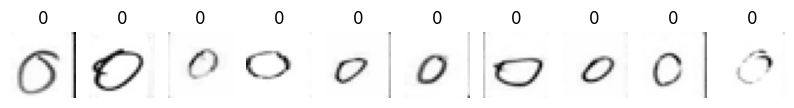

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,3))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(X[i], cmap="gray")
    plt.title(y[i])
    plt.axis("off")
plt.show()

In [17]:
X = X.astype("float32") / 255.0
X = X.reshape(X.shape[0], 28*28)

print("Setelah flatten:", X.shape)  # (jumlah_data, 784)

Setelah flatten: (21555, 784)


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train:", X_train.shape, y_train.shape)
print("Test :", X_test.shape, y_test.shape)

Train: (17244, 784) (17244,)
Test : (4311, 784) (4311,)


In [19]:
from tensorflow.keras.utils import to_categorical

num_classes = 10
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat  = to_categorical(y_test, num_classes)

print("y_train_cat:", y_train_cat.shape)

y_train_cat: (17244, 10)


In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(256, activation="relu", input_shape=(784,)),
    Dropout(0.3),

    Dense(128, activation="relu"),
    Dropout(0.3),

    Dense(10, activation="softmax")
])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [22]:
history = model.fit(
    X_train, y_train_cat,
    epochs=15,
    batch_size=128,
    validation_split=0.2,
    verbose=1
)

Epoch 1/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.1057 - loss: 2.4024 - val_accuracy: 0.1015 - val_loss: 2.2994
Epoch 2/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1125 - loss: 2.2955 - val_accuracy: 0.1250 - val_loss: 2.2953
Epoch 3/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1276 - loss: 2.2804 - val_accuracy: 0.1722 - val_loss: 2.2395
Epoch 4/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1496 - loss: 2.2423 - val_accuracy: 0.1783 - val_loss: 2.2089
Epoch 5/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.1531 - loss: 2.2383 - val_accuracy: 0.1786 - val_loss: 2.1962
Epoch 6/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.1586 - loss: 2.2283 - val_accuracy: 0.1766 - val_loss: 2.1806
Epoch 7/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1612 - loss: 2.2186 - val_accuracy: 0.1705 - val_loss: 2.2069
Epoch 8/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1671 - loss: 2.2065 - val_accuracy: 0.

In [23]:
loss, acc = model.evaluate(X_test, y_test_cat, verbose=0)
print("Test Loss     :", loss)
print("Test Accuracy :", acc)

Test Loss     : 2.1397552490234375
Test Accuracy : 0.19531431794166565


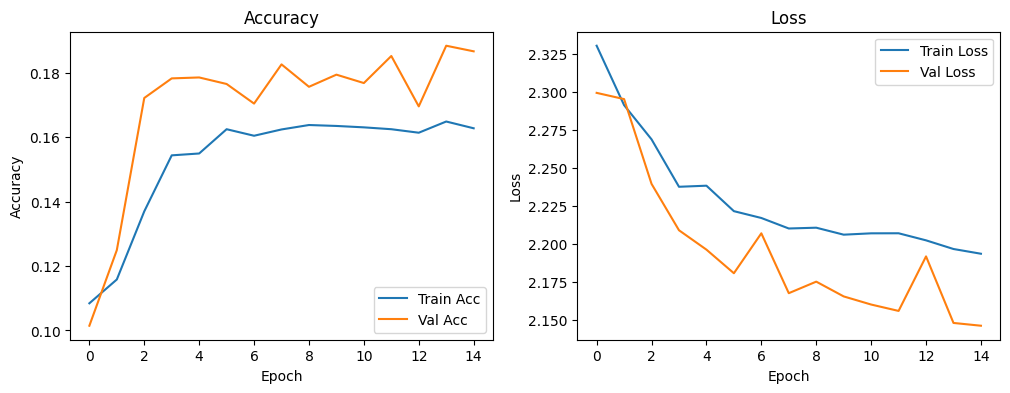

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history["accuracy"], label="Train Acc")
plt.plot(history.history["val_accuracy"], label="Val Acc")
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


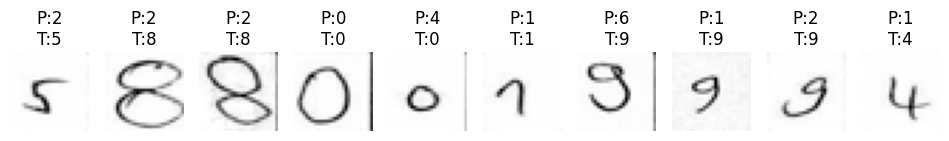

In [25]:
import numpy as np

pred_probs = model.predict(X_test[:10])
pred_labels = np.argmax(pred_probs, axis=1)

plt.figure(figsize=(12,3))
for i in range(10):
    img = X_test[i].reshape(28,28)
    plt.subplot(1,10,i+1)
    plt.imshow(img, cmap="gray")
    plt.title(f"P:{pred_labels[i]}\nT:{y_test[i]}")
    plt.axis("off")
plt.show()